In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv('orig_z_1_yr.csv')

In [3]:
df.head()

,Unnamed: 0,v0,p0,q0,pl0,ql0,v1,p1,q1,pl1,...,pl29,ql29,pl33,ql33,pl34,ql34,pl35,ql35,pl36,ql36
0,0,1.0,-9.194601,5.449477,9.194601,-5.449477,0.996326,0.225414,0.135248,8.285985,...,0.535403,-3.169630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1.0,-9.231028,5.471190,9.231028,-5.471190,0.996311,0.226026,0.135615,8.319024,...,0.538690,-3.182017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1.0,-9.322906,5.525882,9.322906,-5.525882,0.996275,0.227562,0.136537,8.402377,...,0.546964,-3.213219,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1.0,-9.392008,5.566947,9.392008,-5.566947,0.996247,0.228712,0.137227,8.465086,...,0.553173,-3.236647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1.0,-9.189808,5.446618,9.189808,-5.446618,0.996328,0.225333,0.135200,8.281637,...,0.534971,-3.167999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
list(df.columns)


['Unnamed: 0',
 'v0',
 'p0',
 'q0',
 'pl0',
 'ql0',
 'v1',
 'p1',
 'q1',
 'pl1',
 'ql1',
 'v2',
 'p2',
 'q2',
 'pl2',
 'ql2',
 'v3',
 'p3',
 'q3',
 'pl3',
 'ql3',
 'v5',
 'p5',
 'q5',
 'pl5',
 'ql5',
 'v6',
 'p6',
 'q6',
 'pl6',
 'ql6',
 'v7',
 'p7',
 'q7',
 'pl7',
 'ql7',
 'v8',
 'p8',
 'q8',
 'pl8',
 'ql8',
 'v10',
 'p10',
 'q10',
 'pl10',
 'ql10',
 'v11',
 'p11',
 'q11',
 'pl11',
 'ql11',
 'v12',
 'p12',
 'q12',
 'pl12',
 'ql12',
 'v13',
 'p13',
 'q13',
 'pl13',
 'ql13',
 'v15',
 'p15',
 'q15',
 'pl15',
 'ql15',
 'v16',
 'p16',
 'q16',
 'pl16',
 'ql16',
 'v17',
 'p17',
 'q17',
 'pl17',
 'ql17',
 'v18',
 'p18',
 'q18',
 'pl18',
 'ql18',
 'v20',
 'p20',
 'q20',
 'pl20',
 'ql20',
 'v21',
 'p21',
 'q21',
 'pl21',
 'ql21',
 'v22',
 'p22',
 'q22',
 'pl22',
 'ql22',
 'v23',
 'p23',
 'q23',
 'pl23',
 'ql23',
 'v25',
 'p25',
 'q25',
 'pl25',
 'ql25',
 'v26',
 'p26',
 'q26',
 'pl26',
 'ql26',
 'v27',
 'p27',
 'q27',
 'pl27',
 'ql27',
 'v28',
 'p28',
 'q28',
 'pl28',
 'ql28',
 'v30',
 'p30',
 

In [5]:
df.rename(columns={'Unnamed: 0': 's_no'}, inplace=True)

In [6]:
df.head()

,s_no,v0,p0,q0,pl0,ql0,v1,p1,q1,pl1,...,pl29,ql29,pl33,ql33,pl34,ql34,pl35,ql35,pl36,ql36
0,0,1.0,-9.194601,5.449477,9.194601,-5.449477,0.996326,0.225414,0.135248,8.285985,...,0.535403,-3.169630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1.0,-9.231028,5.471190,9.231028,-5.471190,0.996311,0.226026,0.135615,8.319024,...,0.538690,-3.182017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1.0,-9.322906,5.525882,9.322906,-5.525882,0.996275,0.227562,0.136537,8.402377,...,0.546964,-3.213219,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1.0,-9.392008,5.566947,9.392008,-5.566947,0.996247,0.228712,0.137227,8.465086,...,0.553173,-3.236647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1.0,-9.189808,5.446618,9.189808,-5.446618,0.996328,0.225333,0.135200,8.281637,...,0.534971,-3.167999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df.set_index('s_no',inplace=True)

In [8]:
df

,v0,p0,q0,pl0,ql0,v1,p1,q1,pl1,ql1,...,pl29,ql29,pl33,ql33,pl34,ql34,pl35,ql35,pl36,ql36
s_no,,,,,,,,,,,,,,,,,,,,,
0,1.0,-9.194601,5.449477,9.194601,-5.449477,0.996326,0.225414,0.135248,8.285985,-5.301996,...,0.535403,-3.169630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,-9.231028,5.471190,9.231028,-5.471190,0.996311,0.226026,0.135615,8.319024,-5.322727,...,0.538690,-3.182017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,-9.322906,5.525882,9.322906,-5.525882,0.996275,0.227562,0.136537,8.402377,-5.374950,...,0.546964,-3.213219,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,-9.392008,5.566947,9.392008,-5.566947,0.996247,0.228712,0.137227,8.465086,-5.414165,...,0.553173,-3.236647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,-9.189808,5.446618,9.189808,-5.446618,0.996328,0.225333,0.135200,8.281637,-5.299266,...,0.534971,-3.167999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35130,1.0,-10.135839,6.005162,10.135839,-6.005162,0.995951,0.240772,0.144463,9.141083,-5.832892,...,0.619232,-3.486738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35131,1.0,-9.901588,5.867910,9.901588,-5.867910,0.996045,0.237037,0.142222,8.928000,-5.701695,...,0.598582,-3.408391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35132,1.0,-9.894368,5.863668,9.894368,-5.863668,0.996047,0.236921,0.142152,8.921435,-5.697641,...,0.597943,-3.405970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df.shape

(35135, 173)

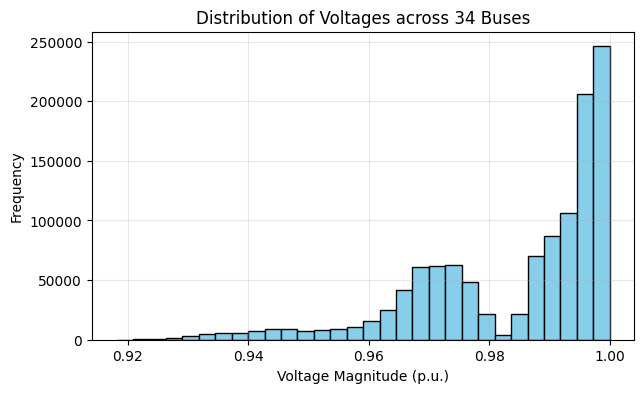

In [10]:
#Histogram of Voltage Magnitude (All Buses)
# Use interactive backend in VS Code (no need to re-import plt)
import matplotlib_inline
import matplotlib.pyplot as plt

v_cols = [c for c in df.columns if c.startswith('v')]
all_v = df[v_cols].values.flatten()

plt.figure(figsize=(7,4))
plt.hist(all_v, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Voltage Magnitude (p.u.)')
plt.ylabel('Frequency')
plt.title('Distribution of Voltages across 34 Buses')
plt.grid(alpha=0.3)
plt.show()


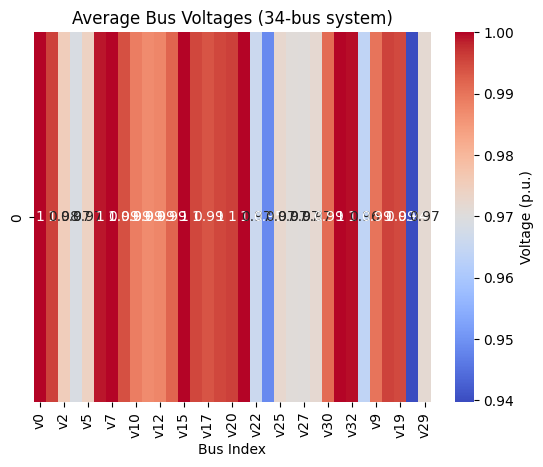

In [12]:
#Voltage heatmap (average voltages per bus)
import seaborn as sns

avg_v = df[v_cols].mean().to_frame().T
sns.heatmap(avg_v, annot=True, cmap='coolwarm', cbar_kws={'label': 'Voltage (p.u.)'})
plt.title('Average Bus Voltages (34-bus system)')
plt.xlabel('Bus Index')
plt.show()


In [13]:
# creating the new dataframe with columns v0,p0,q0
df0 = df[['v0','p0','q0']].copy()
print(df0.head())
print('-'*100)
print(df.shape)

       v0        p0        q0
s_no                         
0     1.0 -9.194601  5.449477
1     1.0 -9.231028  5.471190
2     1.0 -9.322906  5.525882
3     1.0 -9.392008  5.566947
4     1.0 -9.189808  5.446618
----------------------------------------------------------------------------------------------------
(35135, 173)


In [20]:
df0.describe()

,v0,p0,q0
count,35135.0,35135.000000,35135.000000
mean,1.0,-11.076785,6.531249
std,0.0,1.694645,0.967341
min,1.0,-16.167607,4.075688
25%,1.0,-12.387597,5.743128
50%,1.0,-11.000547,6.505801
75%,1.0,-9.689638,7.289029
max,1.0,-6.944031,9.298110


In [22]:
# training pipeline
X = df0[['p0','q0']].values.astype(np.float32)
y = df0[['v0']].values.astype(np.float32)

In [23]:
# 2) Split + scale
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42)
sc = StandardScaler().fit(X_tr)
X_tr = sc.transform(X_tr); X_te = sc.transform(X_te)

X_tr = torch.tensor(X_tr); y_tr = torch.tensor(y_tr)
X_te = torch.tensor(X_te); y_te = torch.tensor(y_te)

In [24]:
# 3) Model
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(2,64), nn.ReLU(),
            nn.Linear(64,64), nn.ReLU(),
            nn.Linear(64,1)
        )
    def forward(self, x): return self.net(x)

model = MLP()
opt = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.MSELoss()

In [25]:
for epoch in range(50):
    model.train(); opt.zero_grad()
    pred = model(X_tr)
    loss = loss_fn(pred, y_tr)
    loss.backward(); opt.step()

In [29]:
# 5) Evaluation (safe version)
model.eval()
with torch.no_grad():
    pred_te = model(X_te)
    mse = ((pred_te - y_te)**2).mean().item()
    ybar = y_te.mean().item()
    ss_tot = ((y_te - ybar)**2).sum().item()
    ss_res = ((y_te - pred_te)**2).sum().item()

    if ss_tot == 0:
        r2 = float('nan')
        print(" Warning: All test target values are identical; R² is undefined.")
    else:
        r2 = 1 - ss_res / ss_tot

print(f"Test MSE: {mse:.6f}, R²: {r2}")


Test MSE: 0.016521, R²: nan


In [27]:
print(y_te.min().item(), y_te.max().item())


1.0 1.0


In [35]:
# checking the sanity of the other volatage in the pipeline
df.loc[:,'v7']

s_no
0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
35130    1.0
35131    1.0
35132    1.0
35133    1.0
35134    1.0
Name: v7, Length: 35135, dtype: float64